In [31]:
import pandas as pd
import matplotlib.pyplot as plt
new_train = pd.read_csv('new_train.csv') 
new_test = pd.read_csv('new_test.csv') 

In [34]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Store                         41088 non-null  int64  
 1   Sales                         0 non-null      float64
 2   Customers                     0 non-null      float64
 3   Open                          41077 non-null  float64
 4   Promo                         41088 non-null  int64  
 5   StateHoliday                  41088 non-null  int64  
 6   SchoolHoliday                 41088 non-null  int64  
 7   Month                         41088 non-null  int64  
 8   Year                          41088 non-null  int64  
 9   DayOfWeek_1                   41088 non-null  bool   
 10  DayOfWeek_2                   41088 non-null  bool   
 11  DayOfWeek_3                   41088 non-null  bool   
 12  DayOfWeek_4                   41088 non-null  bool   
 13  D

In [2]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Store                         844392 non-null  int64  
 1   Sales                         844392 non-null  int64  
 2   Customers                     844392 non-null  int64  
 3   Open                          844392 non-null  int64  
 4   Promo                         844392 non-null  int64  
 5   SchoolHoliday                 844392 non-null  int64  
 6   StateHoliday_0                844392 non-null  bool   
 7   StateHoliday_a                844392 non-null  bool   
 8   StateHoliday_b                844392 non-null  bool   
 9   StateHoliday_c                844392 non-null  bool   
 10  Month                         844392 non-null  int64  
 11  Year                          844392 non-null  int64  
 12  DayOfWeek_1                   844392 non-nul

In [3]:
new_train.isnull().sum()

Store                           0
Sales                           0
Customers                       0
Open                            0
Promo                           0
SchoolHoliday                   0
StateHoliday_0                  0
StateHoliday_a                  0
StateHoliday_b                  0
StateHoliday_c                  0
Month                           0
Year                            0
DayOfWeek_1                     0
DayOfWeek_2                     0
DayOfWeek_3                     0
DayOfWeek_4                     0
DayOfWeek_5                     0
DayOfWeek_6                     0
DayOfWeek_7                     0
CompetitionDistance             0
Promo2                          0
StoreType_a                     0
StoreType_b                     0
StoreType_c                     0
StoreType_d                     0
Assortment_a                    0
Assortment_b                    0
Assortment_c                    0
CompetitionOpenSinceDays        0
Promo2SinceDay

In [3]:
# train test split
from sklearn.model_selection import train_test_split

X = new_train.drop(columns=['Sales'])  
y = new_train['Sales']                


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
!pip install xgboost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [8]:
new_train["Sales"].median() # to evaluate the error

6369.0

In [9]:


xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_scaled, y_train)


y_pred = xgb_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    xgb_model, 
    param_distributions=param_dist, 
    n_iter=50, 
    scoring='neg_mean_squared_error', 
    cv=3, 
    verbose=2, 
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train_scaled, y_train)


best_params = random_search.best_params_
print(f"Best parameters: {best_params}")


best_xgb_model = XGBRegressor(objective='reg:squarederror', **best_params)
best_xgb_model.fit(X_train_scaled, y_train)


y_pred_best = best_xgb_model.predict(X_test_scaled)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("Best XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R-squared (R²): {r2_best}")

XGBoost Model Performance:
Mean Squared Error (MSE): 330394.8415774755
Root Mean Squared Error (RMSE): 574.7998273986132
R-squared (R²): 0.9655312753254954
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best XGBoost Model Performance:
Mean Squared Error (MSE): 187129.21640367855
Root Mean Squared Error (RMSE): 432.58434599934213
R-squared (R²): 0.9804775843110078


In [10]:
# loss function squarederror
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

best_params = {
    'subsample': 0.8,
    'n_estimators': 500,
    'min_child_weight': 1,
    'max_depth': 7,
    'learning_rate': 0.2,
    'colsample_bytree': 1.0
}

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

XGBoost Model Performance:
Mean Squared Error (MSE): 186222.98488334042
Root Mean Squared Error (RMSE): 431.53561253196756
R-squared (R²): 0.9805721276901259


In [7]:
# now we do it with validation set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = new_train.drop(columns=['Sales'])  # Features: all columns except 'Sales'
y = new_train['Sales']                # Target: the 'Sales' column

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

remaining_X = len(X_train_full)
validation_size = int(remaining_X * 0.1)  # 10% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=validation_size, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Use transform() for validation and test sets
X_test_scaled = scaler.transform(X_test)

print("Training set size:", X_train_scaled.shape[0])
print("Validation set size:", X_val_scaled.shape[0])
print("Test set size:", X_test_scaled.shape[0])



Training set size: 607962
Validation set size: 67551
Test set size: 168879


In [8]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Best parameters from the previous randomized search
best_params = {
    'subsample': 0.8,
    'n_estimators': 500,
    'min_child_weight': 1,
    'max_depth': 7,
    'learning_rate': 0.2,
    'colsample_bytree': 1.0
}

# best parameters and default loss function (Squared Error)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
xgb_model.fit(X_train_scaled, y_train, eval_set=[(X_val_scaled, y_val)], early_stopping_rounds=10, verbose=False)

y_pred = xgb_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


/Users/elif/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBoost Model Performance:
Mean Squared Error (MSE): 188349.44062848037
Root Mean Squared Error (RMSE): 433.9924430545771
R-squared (R²): 0.9803502833742105


<Figure size 1000x600 with 0 Axes>

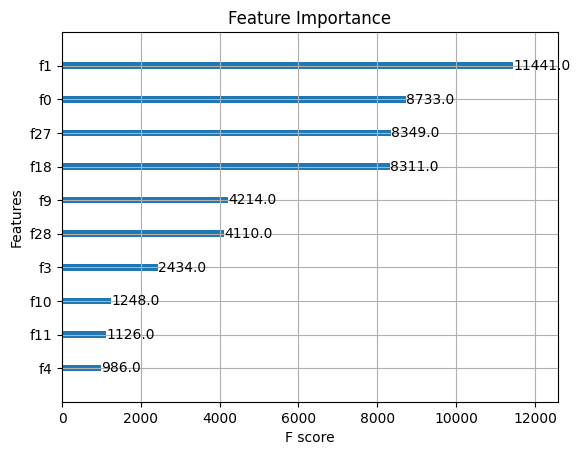

In [9]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# feature importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, title='Feature Importance')
plt.savefig('feature_importance.png')  # Save the plot as an image file


In [36]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train = new_train.drop(columns=['Customers', 'Sales'])
y_customers = new_train['Customers']
y_sales = new_train['Sales']

X_train_features, X_val_features, y_train_customers, y_val_customers = train_test_split(
    X_train, y_customers, test_size=0.2, random_state=42
)
X_train_features, X_val_features, y_train_sales, y_val_sales = train_test_split(
    X_train, y_sales, test_size=0.2, random_state=42
)

xgb_model_customers = XGBRegressor(
    objective='reg:squarederror', 
    random_state=42
)
xgb_model_sales = XGBRegressor(
    objective='reg:squarederror', 
    random_state=42
)
#customers
xgb_model_customers.fit(
    X_train_features, y_train_customers, 
    eval_set=[(X_val_features, y_val_customers)], 
    verbose=False
)

#Sales
xgb_model_sales.fit(
    X_train_features, y_train_sales, 
    eval_set=[(X_val_features, y_val_sales)], 
    verbose=False
)


X_test = new_test[X_train.columns]  # Align test set features with training set features

# 11 missing values in test open, impute
X_test['Open'] = X_test['Open'].fillna(X_test['Open'].mean())  # Simple imputation example

# predictions
new_test['Customers'] = xgb_model_customers.predict(X_test)
new_test['Sales'] = xgb_model_sales.predict(X_test)

# Saving results
new_test.to_csv('path_to_new_test_predictions.csv', index=False)



/var/folders/yg/xmn_7fzd29x_t6vxtfn8_gsw0000gn/T/ipykernel_68189/3525998605.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Open'] = X_test['Open'].fillna(X_test['Open'].mean())  # Simple imputation example



Predictions have been saved to 'path_to_new_test_predictions.csv'.
